In [1]:
import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from metric_voting import *
from metric_voting.plotting import *

%load_ext autoreload
%autoreload 2

In [20]:
# Colors for plotting!
colors = ["#0099cd","#ffca5d","#00cd99","#99cd00","#cd0099","#9900cd","#8dd3c7",
        "#bebada","#fb8072","#80b1d3","#fdb462","#b3de69","#fccde5","#bc80bd",
        "#ccebc5","#ffed6f","#ffffb3","#a6cee3","#1f78b4","#b2df8a","#33a02c",
        "#fb9a99","#e31a1c","#fdbf6f","#ff7f00","#cab2d6","#6a3d9a","#b15928",
        "#64ffda","#00B8D4","#A1887F","#76FF03","#DCE775","#B388FF","#FF80AB",
        "#D81B60","#26A69A","#FFEA00","#6200EA",
    ]

colors2 = colors[:6] + [colors[8]] + [colors[9]] +colors[-7:]

voter_color = colors2[0]
candidate_color = colors2[9]
winner_color = colors2[5]
bloc_color = colors2[4]
reps_color = winner_color

# Profile Generation:

In [6]:
# Choose number of voters n and the number of candidates m
n = 1000
m = 20

# Choose the number of winners for the election
k = 4

In [37]:
# Means and standard deviations for each of the two voter distributions
means = [[0, -2], [0, 2]]
stds = [1, 1]
group_sizes = [500,500]  # Group Sizes (50 in each group)

# Create a list of voter parameters -- with each set of parameters being a dict
voter_params = [{'loc': None, 'scale': None, 'size': 2} for _ in range(len(group_sizes))]
for i,mean in enumerate(means):
    voter_params[i]['loc'] = mean

for i,std in enumerate(stds):
    voter_params[i]['scale'] = std
    
# Define the single set of candidate paramters
candidate_params = [{'low': -3, 'high': 3, 'size': 2}]

# define a distance function between voters and candidates
distance = lambda point1, point2: np.linalg.norm(point1 - point2)

# Create the group spatial generator object!
two_party_generator = GroupSpatial(
    n_voter_groups = 2,
    n_candidate_groups = 1, 
    voter_dist_fns = [np.random.normal]*len(group_sizes),
    voter_dist_fn_params = voter_params,
    candidate_dist_fns = [np.random.uniform],
    candidate_dist_fn_params = candidate_params,
    distance_fn = distance
)

In [38]:
# Now each call .generate() will make a profile with random candidate and voter positions
profile, \
candidate_positions, \
voter_positions, \
candidate_labeles, \
voter_labels = two_party_generator.generate(voter_group_sizes = group_sizes, 
                                            candidate_group_sizes = [m])

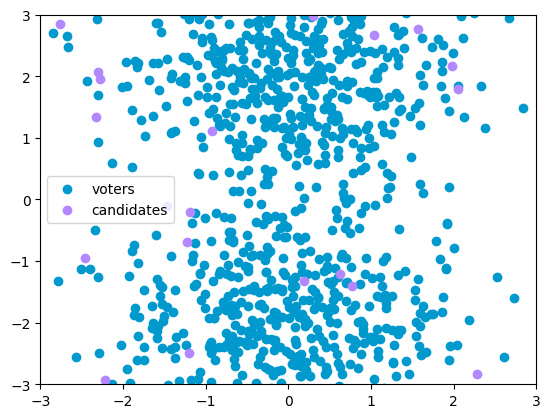

In [41]:
# visualize the results
pal = sns.color_palette("hls", 8)
plt.scatter(voter_positions[:,0], voter_positions[:,1], label = 'voters', color = voter_color)
plt.scatter(candidate_positions[:,0], candidate_positions[:,1], label = 'candidates', color = candidate_color, alpha = 1)
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.legend()

# Running Elections

In [32]:
E = STV(transfer_type = 'weighted-fractional', tiebreak_type = 'fpv_random')
winners = E.elect(profile, k)

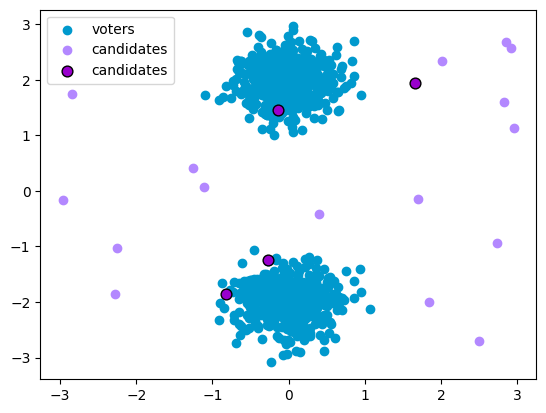

In [33]:
pal = sns.color_palette("hls", 8)
plt.scatter(voter_positions[:,0], voter_positions[:,1], label = 'voters', color = voter_color)
plt.scatter(candidate_positions[:,0], candidate_positions[:,1], label = 'candidates', color = candidate_color, alpha = 1)
plt.scatter(candidate_positions[winners,0], candidate_positions[winners,1], label = 'candidates',
            color = winner_color, edgecolor ='black', alpha = 1, s = 60)
plt.legend()